In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
warnings.filterwarnings('ignore')

print(" Libraries loaded successfully!")

 Libraries loaded successfully!


In [6]:

df = pd.read_csv("C:/Users/Srinidhi Prabhu M U/Sales_Data.csv", encoding='MacRoman')

print(f"Data loaded successfully!")
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print("\nFirst few rows:")
df.head()

Data loaded successfully!
Total rows: 51290
Total columns: 24

First few rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7-31-2012,7-31-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,02-05-2013,02-07-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10-17-2013,10-18-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1-28-2013,1-30-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11-05-2013,11-06-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [8]:

print("DATA QUALITY CHECK")


print("\n1. Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")

print("\n2. Duplicate Rows:")
print(f"Found {df.duplicated().sum()} duplicate rows")

print("\n3. Data Types:")
print(df.dtypes)

DATA QUALITY CHECK

1. Missing Values:
Postal Code    41296
dtype: int64

2. Duplicate Rows:
Found 0 duplicate rows

3. Data Types:
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


In [10]:

print("Cleaning data...")
before_rows = len(df)

df = df.dropna()
df = df.drop_duplicates()

after_rows = len(df)

print(f" Removed {before_rows - after_rows} rows")
print(f"Clean dataset now has {after_rows} rows")

Cleaning data...
 Removed 41296 rows
Clean dataset now has 9994 rows


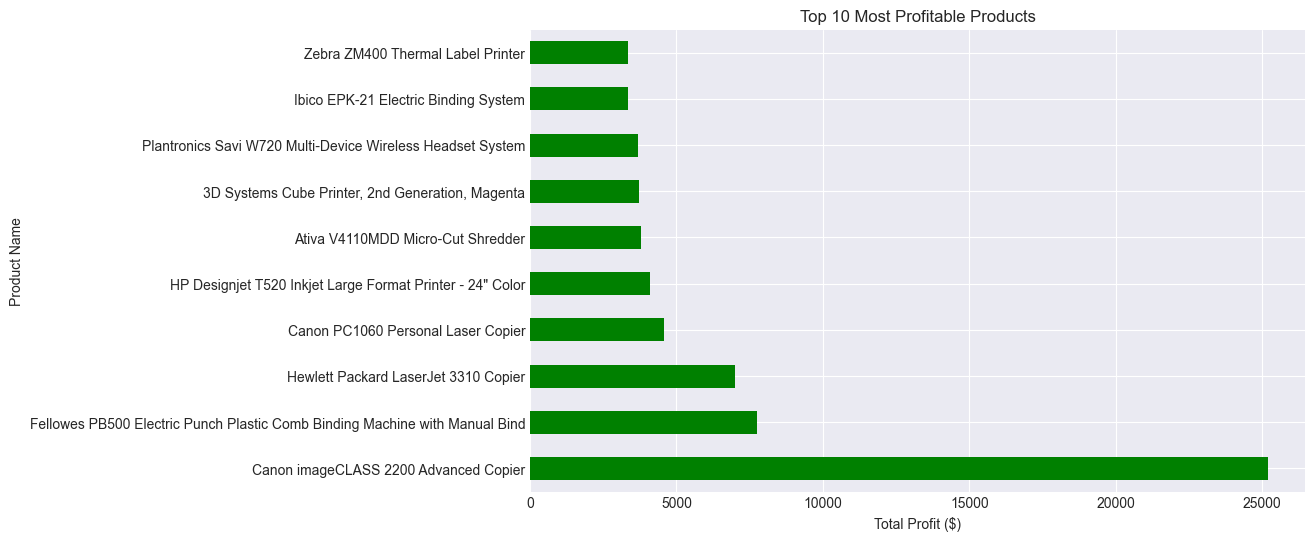


OUTCOME:
Most profitable product: Canon imageCLASS 2200 Advanced Copier
Profit: $25,199.93


In [11]:

top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.show()

# OUTCOME
print('\nOUTCOME:')
print(f'Most profitable product: {top_products.index[0]}')
print(f'Profit: ${top_products.iloc[0]:,.2f}')

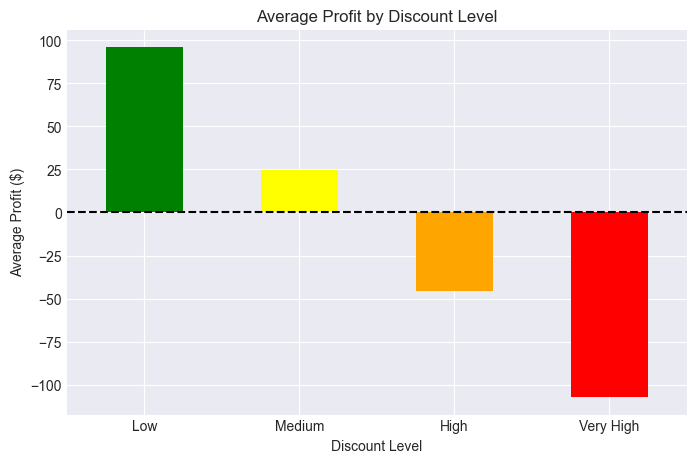


 OUTCOME:
Best profit: Low discount
Conclusion: Higher discounts = Lower profits!


In [13]:
discount_levels = pd.cut(df['Discount'], 
                         bins=[0, 0.1, 0.2, 0.3, 1],
                         labels=['Low', 'Medium', 'High', 'Very High'])

profit_by_discount = df.groupby(discount_levels)['Profit'].mean()

# Bar chart
plt.figure(figsize=(8, 5))
profit_by_discount.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Profit by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=0)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


print('\n OUTCOME:')
print(f'Best profit: {profit_by_discount.idxmax()} discount')
print('Conclusion: Higher discounts = Lower profits!')

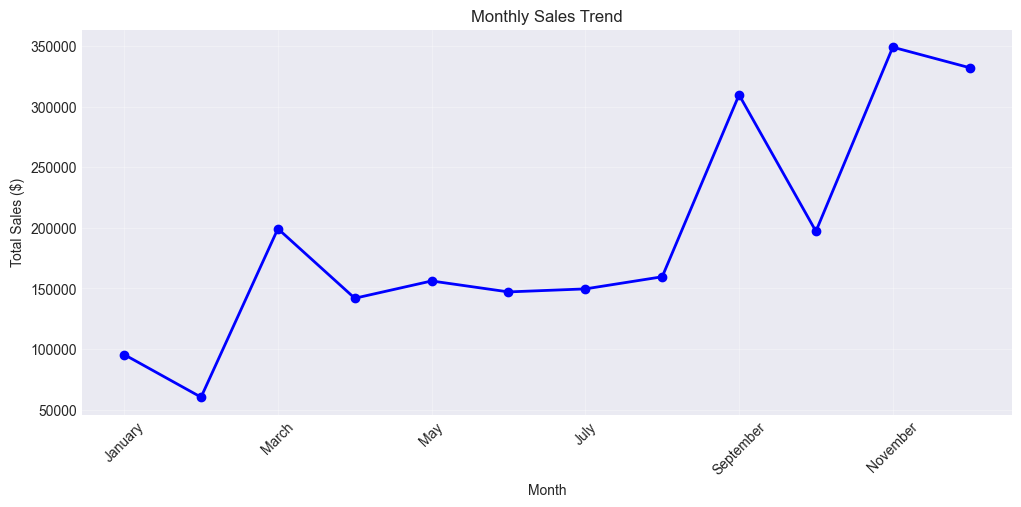


 OUTCOME:
Best month: November with $349,120.07
Worst month: February with $60,172.65


In [14]:

df['Month'] = pd.to_datetime(df['Order Date']).dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('Month')['Sales'].sum().reindex(month_order)

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# OUTCOME
print('\n OUTCOME:')
print(f'Best month: {monthly_sales.idxmax()} with ${monthly_sales.max():,.2f}')
print(f'Worst month: {monthly_sales.idxmin()} with ${monthly_sales.min():,.2f}')

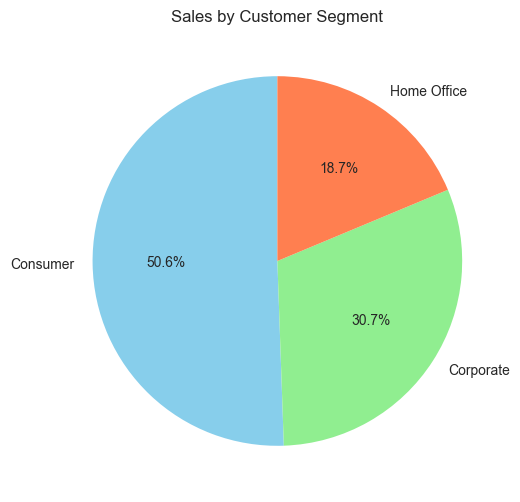


OUTCOME:
Largest segment: Consumer
Sales: $1,161,401.34 (50.6%)


In [15]:

segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(8, 6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%',
        colors=['skyblue', 'lightgreen', 'coral'], startangle=90)
plt.title('Sales by Customer Segment')
plt.show()

# OUTCOME
print('\nOUTCOME:')
print(f'Largest segment: {segment_sales.idxmax()}')
print(f'Sales: ${segment_sales.max():,.2f} ({segment_sales.max()/segment_sales.sum()*100:.1f}%)')

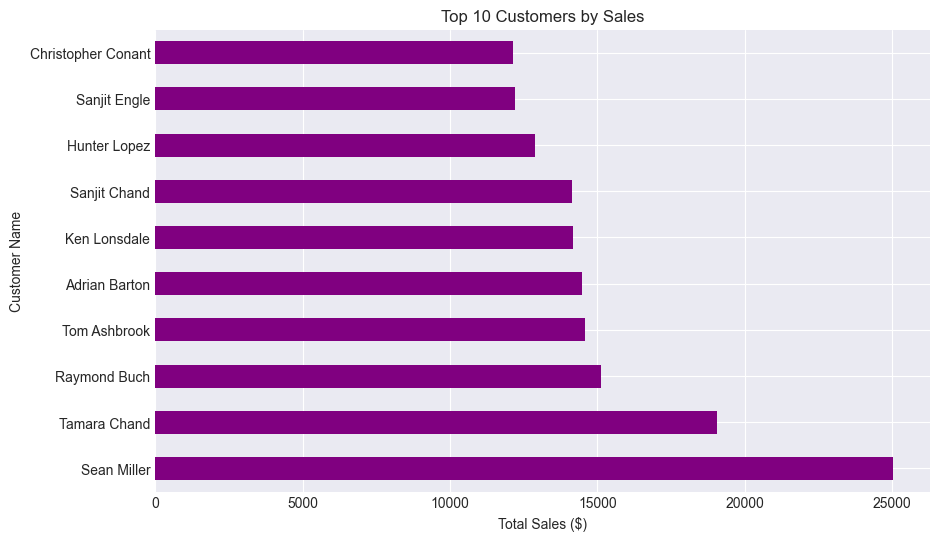


OUTCOME:
Top customer: Sean Miller
Total spent: $25,043.05


In [16]:

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='barh', color='purple')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Name')
plt.show()

# OUTCOME
print('\nOUTCOME:')
print(f'Top customer: {top_customers.index[0]}')
print(f'Total spent: ${top_customers.iloc[0]:,.2f}')

<Figure size 1000x600 with 0 Axes>

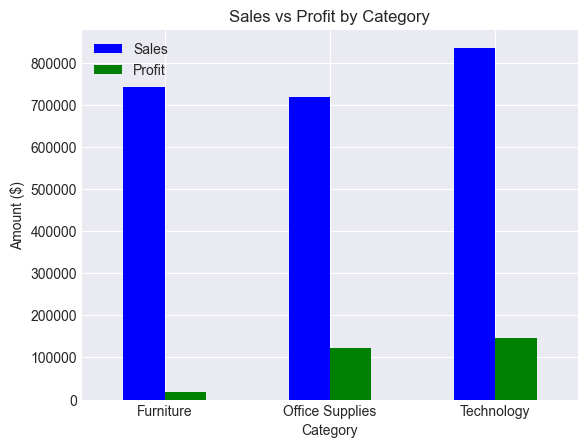


OUTCOME:
Highest sales: Technology
Highest profit: Technology


In [17]:

category_data = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
})

plt.figure(figsize=(10, 6))
category_data[['Sales', 'Profit']].plot(kind='bar', color=['blue', 'green'])
plt.title('Sales vs Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.legend(['Sales', 'Profit'])
plt.show()

# OUTCOME
print('\nOUTCOME:')
print(f'Highest sales: {category_data["Sales"].idxmax()}')
print(f'Highest profit: {category_data["Profit"].idxmax()}')

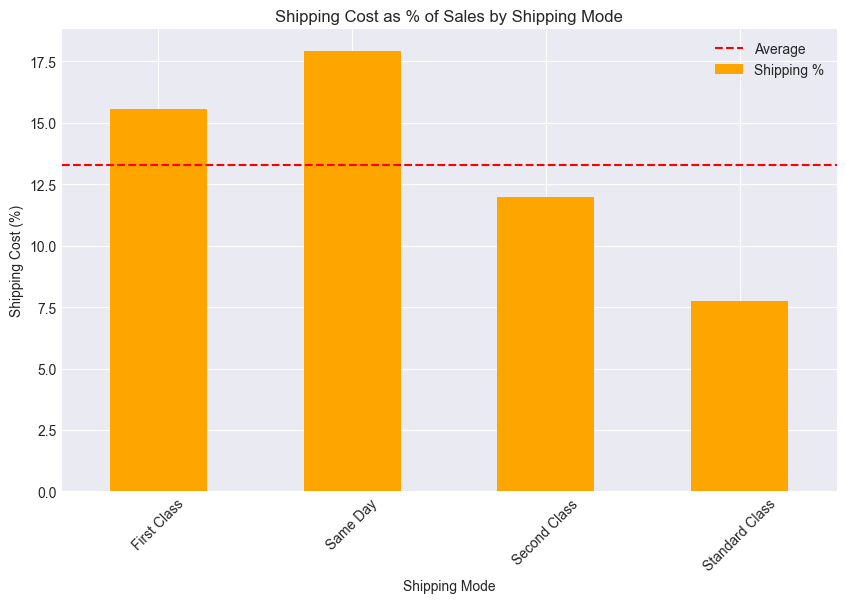


OoUTCOME:
Most expensive shipping: Same Day
Cost: 17.91% of sales
Cheapest shipping: Standard Class
Cost: 7.76% of sales

Conclusion: Choose shipping mode based on urgency vs cost!


In [19]:

ship_mode_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Shipping Cost': 'sum',
    'Profit': 'sum'
})

ship_mode_analysis['Shipping %'] = (ship_mode_analysis['Shipping Cost'] / 
                                     ship_mode_analysis['Sales'] * 100)

plt.figure(figsize=(10, 6))
ship_mode_analysis['Shipping %'].plot(kind='bar', color='orange')
plt.title('Shipping Cost as % of Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Shipping Cost (%)')
plt.xticks(rotation=45)
plt.axhline(y=ship_mode_analysis['Shipping %'].mean(), 
            color='red', linestyle='--', label='Average')
plt.legend()
plt.show()

# OUTCOME
print('\nOoUTCOME:')
print(f'Most expensive shipping: {ship_mode_analysis["Shipping %"].idxmax()}')
print(f'Cost: {ship_mode_analysis["Shipping %"].max():.2f}% of sales')
print(f'Cheapest shipping: {ship_mode_analysis["Shipping %"].idxmin()}')
print(f'Cost: {ship_mode_analysis["Shipping %"].min():.2f}% of sales')
print('\nConclusion: Choose shipping mode based on urgency vs cost!')

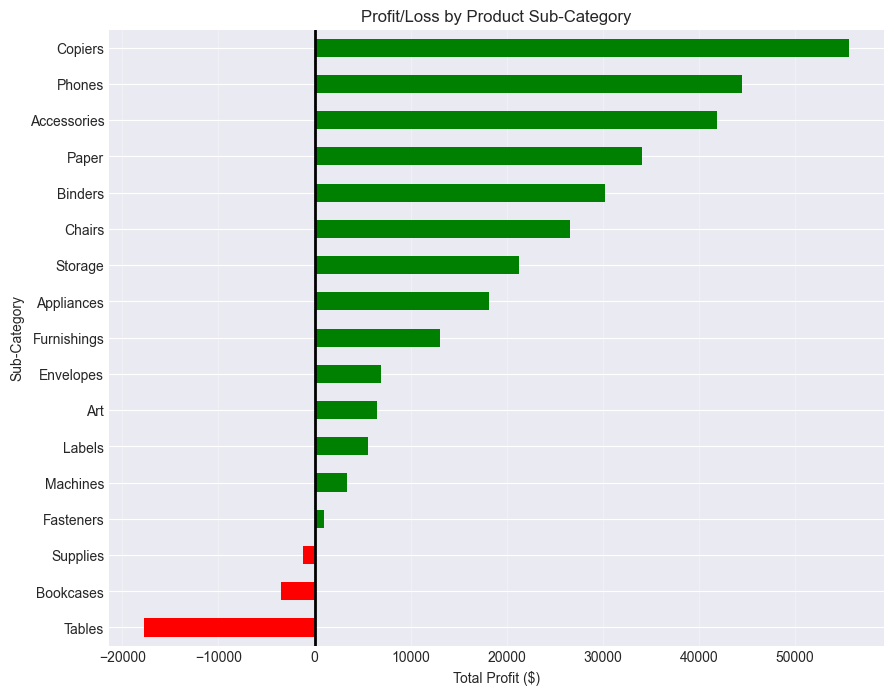


OUTCOME:

Most profitable sub-category: Copiers
Profit: $55,617.82

Biggest loss sub-category: Tables
Loss: $-17,725.48

Total profitable categories: 14
Total loss-making categories: 3

Action: Consider discontinuing or repricing loss-making products!


In [18]:

product_performance = df.groupby('Sub-Category')['Profit'].sum().sort_values()

profitable = product_performance[product_performance > 0]
loss_making = product_performance[product_performance < 0]

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in product_performance]
product_performance.plot(kind='barh', color=colors)
plt.title('Profit/Loss by Product Sub-Category')
plt.xlabel('Total Profit ($)')
plt.ylabel('Sub-Category')
plt.axvline(x=0, color='black', linestyle='-', linewidth=2)
plt.grid(True, alpha=0.3, axis='x')
plt.show()

# OUTCOME
print('\nOUTCOME:')
print(f'\nMost profitable sub-category: {profitable.idxmax()}')
print(f'Profit: ${profitable.max():,.2f}')
print(f'\nBiggest loss sub-category: {loss_making.idxmin()}')
print(f'Loss: ${loss_making.min():,.2f}')
print(f'\nTotal profitable categories: {len(profitable)}')
print(f'Total loss-making categories: {len(loss_making)}')
print('\nAction: Consider discontinuing or repricing loss-making products!')